# <center>Тема 1. Разведочный анализ данных</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

Мы будем работать с данными [Titanic](https://www.kaggle.com/c/titanic): он содержит информацию о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [69]:
data = pd.read_csv('titanic.csv', index_col='PassengerId')

## Описание данных

**Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).**

**Каждая строчка наборов данных содержит следующие поля:**

**Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);**

**Name — имя;**

**Sex — пол;**

**Age — возраст;**

**SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;**

**Parch — количество родителей, детей (в том числе приемных) на борту титаника;**

**Ticket — номер билета;**

**Fare — плата за проезд;**

**Cabin — каюта;**

**Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).**

**Вывести размер таблицы**

In [70]:
data.shape

(891, 11)

**Данные представлены в виде таблицы. Вывести первые 5 строк:**

In [71]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Вывести описательную статистику**

In [72]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Определите, сколько пассажиров выжило, а сколько - нет?**

In [73]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Правда ли, что пассажиры более высокого класса имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [74]:
percent_survived = data.groupby('Pclass')['Survived'].mean() * 100
percent_survived

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

**Правда ли, что женщины имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [75]:
percent_sex = data.groupby('Sex')['Survived'].mean() * 100
percent_sex

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

**Cколько мужчин и женщин в каждом классе (Pclass)?**

Результаты представить в виде таблицы сопряженности.

In [76]:
cross_table = result = pd.crosstab(data['Pclass'], data['Sex'])
cross_table

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


**Вывести пассажиров, которые сели в Шербуре (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200). Отсортировать этих пассажиров по убыванию платы за билет.**

In [77]:
filtered_data = data[(data['Embarked'] == 'Q') & (data['Fare'] > 50)]
sorted_data = filtered_data.sort_values('Fare', ascending=False)
sorted_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q


**Создать категориальный признак для заданных градаций возраста пассажира.**

In [78]:
def age_category(age):
    if age <= 18:
        return 'Ребёнок'
    elif (age <= 30) and (age > 18):
        return 'Молодой'
    elif (age <= 60) and (age > 30):
        return 'Взрослый'
    else:
        return 'Пожилой'
    
data['Age_Category'] = data['Age'].apply(age_category)
data['Age_Category']

PassengerId
1       Молодой
2      Взрослый
3       Молодой
4      Взрослый
5      Взрослый
         ...   
887     Молодой
888     Молодой
889     Пожилой
890     Молодой
891    Взрослый
Name: Age_Category, Length: 891, dtype: object

**Определить, сколько мужчин / женщин находилось на борту?**

In [79]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Определить, сколько было мужчин 2-го класса**

In [80]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Распределения для мужчин отдельно

In [81]:
data[data['Sex'] == 'male']['Pclass'].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

Распределения для женщин отдельно

In [82]:
data[data['Sex'] == 'female']['Pclass'].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

Количество мужчин во втором классе

In [83]:
male_count = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)].shape[0]
male_count

108

**Определите, какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?**

In [84]:
survived3 = data[(data['Pclass'] == 3) & (data['Survived'] == 1)].shape[0]
total_class3 = data[data['Pclass'] == 3].shape[0]
survival_rate3 = survived3 / total_class3
print("Доля выживших 3 класса - ", survival_rate3)

survived1 = data[(data['Pclass'] == 1) & (data['Survived'] == 1)].shape[0]
total_class1 = data[data['Pclass'] == 1].shape[0]
survival_rate1 = survived1 / total_class1
print("Доля выживших 1 класса - ", survival_rate1)

Доля выживших 3 класса -  0.24236252545824846
Доля выживших 1 класса -  0.6296296296296297


**Определить медиану и стандартное отклонение платежей (`Fare`). Округлить до 2 десятичных знаков.**

In [85]:
median_fare = data['Fare'].median()
std_fare = data['Fare'].std()
median_fare = round(median_fare, 2)
std_fare = round(std_fare, 2)

print("Медиана платежей - ", median_fare)
print("Стандартное отклонение платежей - ", std_fare)

Медиана платежей -  14.45
Стандартное отклонение платежей -  49.69


**Проверить, что люди моложе 30 лет выживают чаще, чем люди старше 60 лет. Определить доли выживших в обеих группах**

In [86]:
young_passengers = data[data['Age'] < 30]
old_passengers = data[data['Age'] > 60]

survival_rate_young = young_passengers['Survived'].mean()
survival_rate_old = old_passengers['Survived'].mean()

print("Доля выживших пассажиров моложе 30 лет:", survival_rate_young)
print("Доля выживших пассажиров старше 60 лет:", survival_rate_old)

Доля выживших пассажиров моложе 30 лет: 0.40625
Доля выживших пассажиров старше 60 лет: 0.22727272727272727


**Проверить, что женщины выживают чаще мужчин. Определить доли выживших в обеих группах**

In [87]:
women = data[data['Sex'] == 'female']
men = data[data['Sex'] == 'male']

survival_rate_women = women['Survived'].mean()
survival_rate_men = men['Survived'].mean()
print("Доля выживших женщин:", survival_rate_women)
print("Доля выживших мужчин:", survival_rate_men)

Доля выживших женщин: 0.7420382165605095
Доля выживших мужчин: 0.18890814558058924


**Найдите самое популярное имя среди пассажиров Титаника мужского пола**

In [88]:
male_passengers = data[data['Sex'] == 'male']
male_names = male_passengers['Name']
male_names = male_names.str.split(',').str[1]
male_names = male_names.str.split().str[1]
popular_male_name = male_names.mode()[0]
popular_male_name

'William'

**Определить, как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания. Выберать верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [89]:
mean_age_by_sex_class = data.groupby(['Sex', 'Pclass'])['Age'].mean()
if mean_age_by_sex_class['male', 1] > 40:
    print("В среднем мужчины 1-го класса старше 40 лет - Верно")
else:
    print("В среднем мужчины 1-го класса старше 40 лет - Неверно")
    
if mean_age_by_sex_class['female', 1] > 40:
    print("В среднем женщины 1-го класса старше 40 лет - Верно")
else:
    print("В среднем женщины 1-го класса старше 40 лет - Неверно")
    
if (mean_age_by_sex_class['male', 1] > mean_age_by_sex_class['female', 1]) and \
   (mean_age_by_sex_class['male', 2] > mean_age_by_sex_class['female', 2]) and \
   (mean_age_by_sex_class['male', 3] > mean_age_by_sex_class['female', 3]):
    print("Мужчины всех классов в среднем старше женщин того же класса - Верно")
else:
    print("Мужчины всех классов в среднем старше женщин того же класса - Неверно")

if (mean_age_by_sex_class['male', 1] > mean_age_by_sex_class['male', 2] > mean_age_by_sex_class['male', 3]) and \
   (mean_age_by_sex_class['female', 1] > mean_age_by_sex_class['female', 2] > mean_age_by_sex_class['female', 3]):
    print("В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса - Верно")
else:
    print("В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса - Неверно")
    

В среднем мужчины 1-го класса старше 40 лет - Верно
В среднем женщины 1-го класса старше 40 лет - Неверно
Мужчины всех классов в среднем старше женщин того же класса - Верно
В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса - Верно


In [90]:
print(mean_age_by_sex_class)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64


**Визуализируйте пропуски**

Используем библиотеку `missingno`

<Axes: >

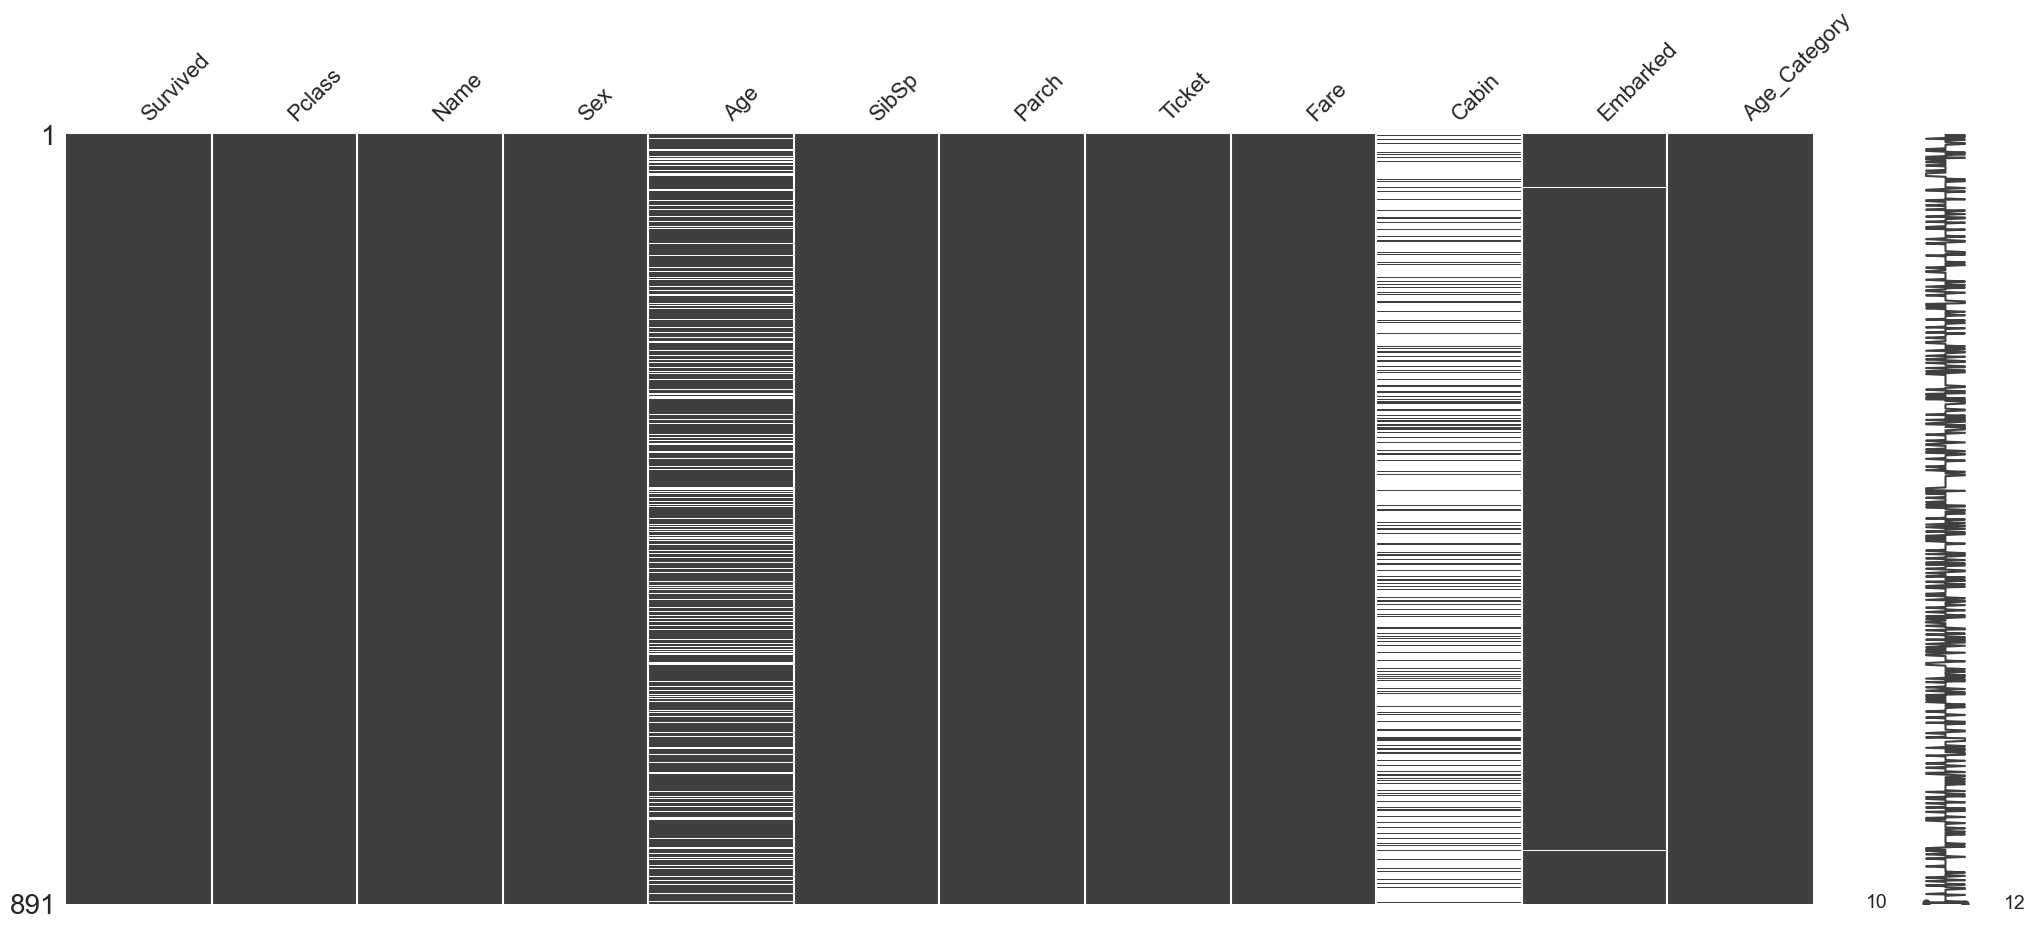

In [91]:
import missingno 
missingno.matrix(data)

**Выкинем признак Cabin. Столбец Age заполним медианным значением. Оставшиеся строки с пропусками удалим.**

In [92]:
data.drop(columns = ['Cabin'], inplace=True)
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)
data.dropna(inplace=True)

**Для категориальных переменных построить столбчатую диаграмму**

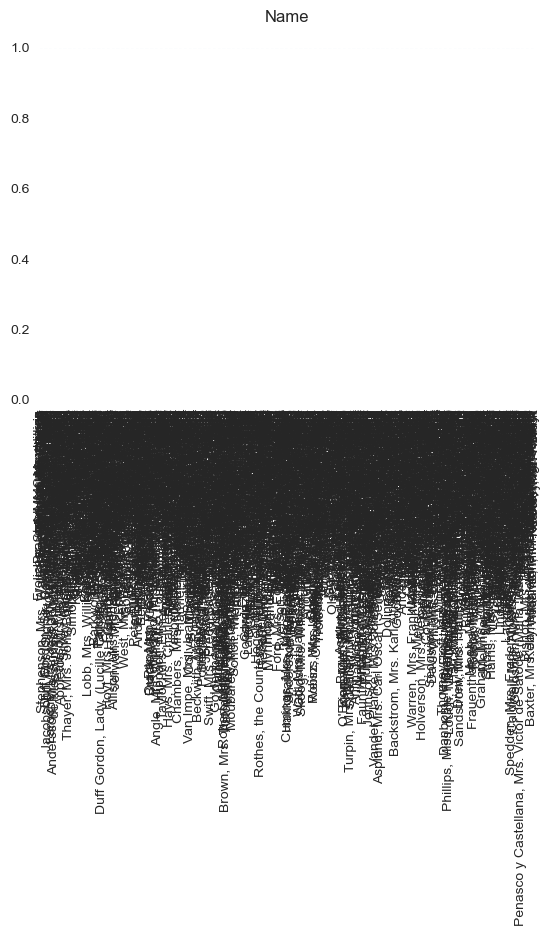

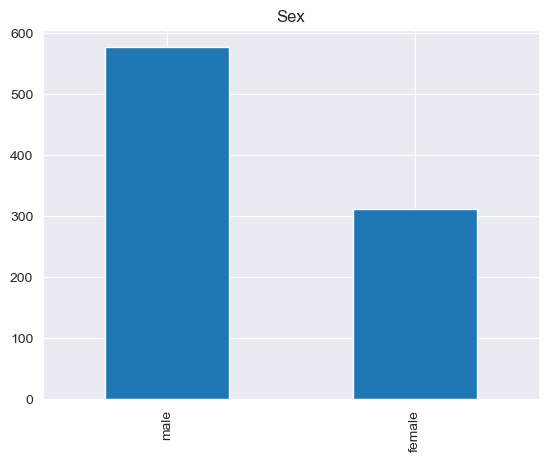

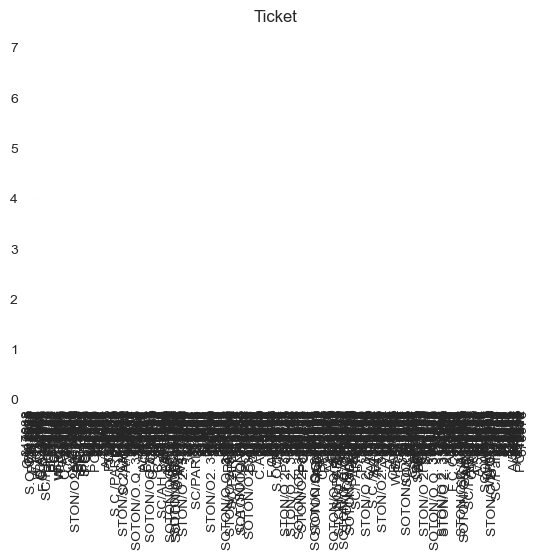

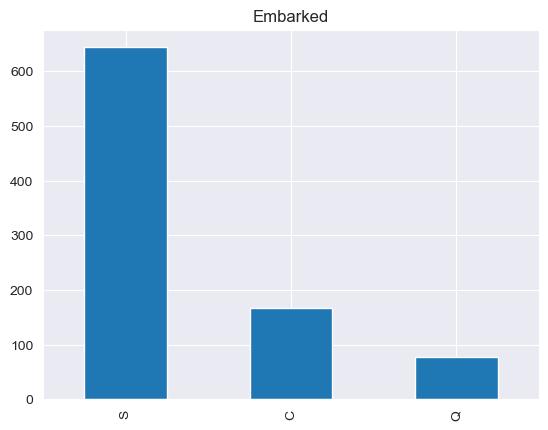

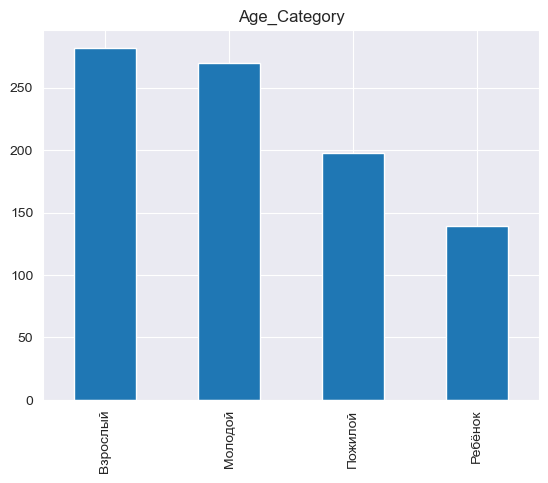

In [93]:
categorical_data = data.select_dtypes(include=['object'])
for column in categorical_data.columns:
    categorical_data[column].value_counts().plot(kind="bar")
    plt.title(column)
    plt.show()


**Постройте попарные зависимости (диаграммы рассеяния) для признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

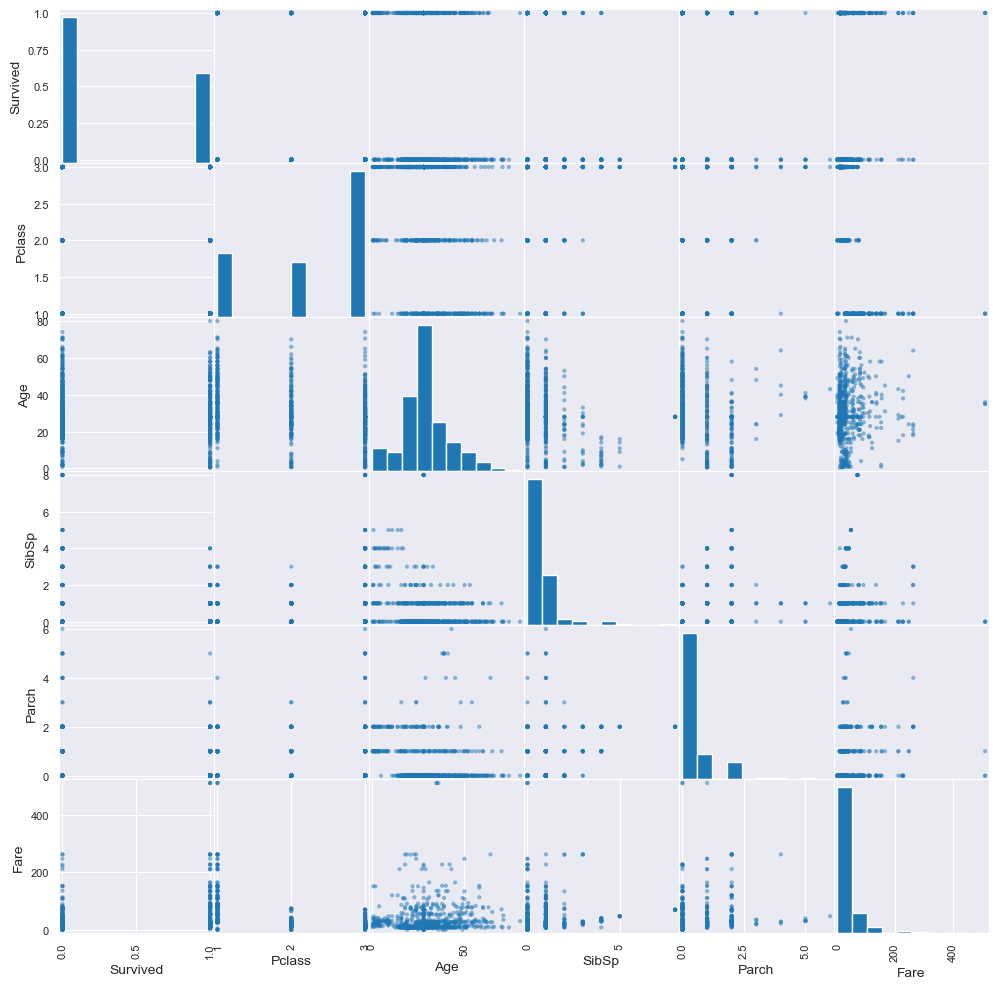

In [94]:
scatter_matrix(data, figsize=(12, 12))
plt.show()

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

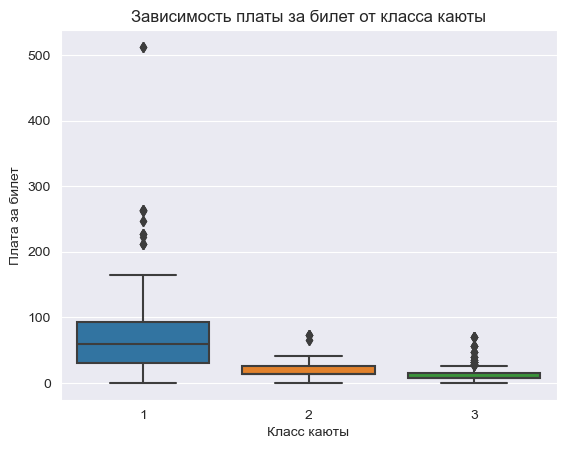

In [95]:
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Зависимость платы за билет от класса каюты')
plt.xlabel('Класс каюты')
plt.ylabel('Плата за билет')
plt.show()

**Такой boxplot получается не очень красивым из-за выбросов.**

**Опционально: создайте признак Fare_no_out (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости. Постройте boxplot.**

C:\Users\sagop\AppData\Local\Temp\ipykernel_19248\3385891669.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
C:\Users\sagop\AppData\Local\Temp\ipykernel_19248\3385891669.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(fare_pclass3_no_out)


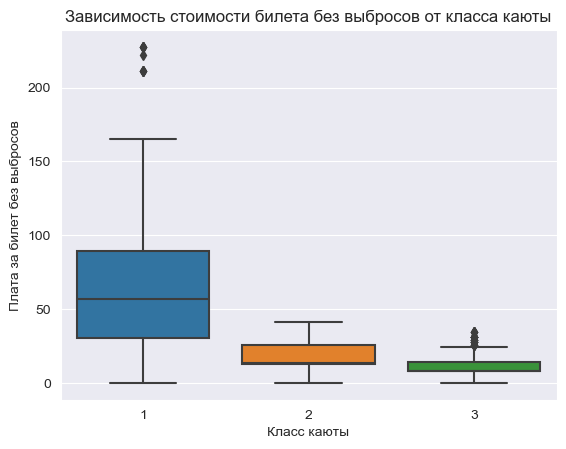

In [96]:
# Функция для исключения выбросов
def remove_outliers(group):
    mean = group.mean()
    std = group.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    return group[(group >= lower_bound) & (group <= upper_bound)]

train_df = data.copy()
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = remove_outliers(train_df[train_df['Pclass'] == 1]['Fare'])
fare_pclass2_no_out = remove_outliers(train_df[train_df['Pclass'] == 2]['Fare'])
fare_pclass3_no_out = remove_outliers(train_df[train_df['Pclass'] == 3]['Fare'])
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)

sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df)
plt.title('Зависимость стоимости билета без выбросов от класса каюты')
plt.xlabel('Класс каюты')
plt.ylabel('Плата за билет без выбросов')
plt.show()

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot (столбчатая диаграмма) c аргументом hue.**

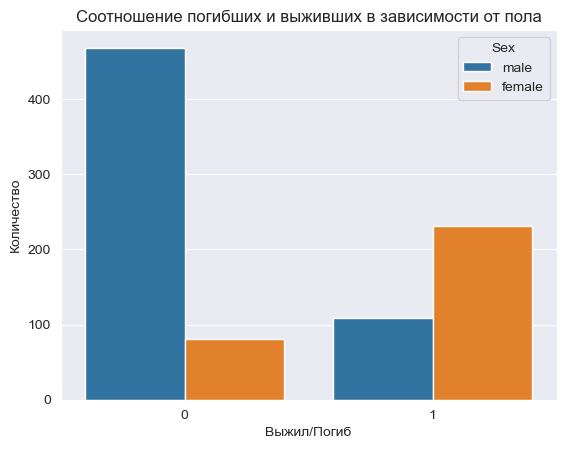

In [97]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Соотношение погибших и выживших в зависимости от пола')
plt.xlabel('Выжил/Погиб')
plt.ylabel('Количество')
plt.show()

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.** 

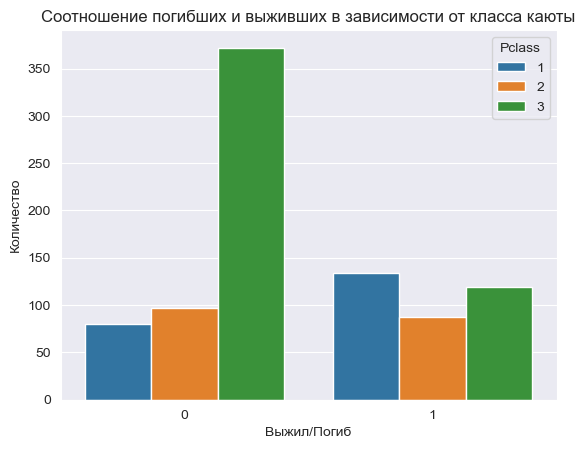

In [98]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Соотношение погибших и выживших в зависимости от класса каюты')
plt.xlabel('Выжил/Погиб')
plt.ylabel('Количество')
plt.show()

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

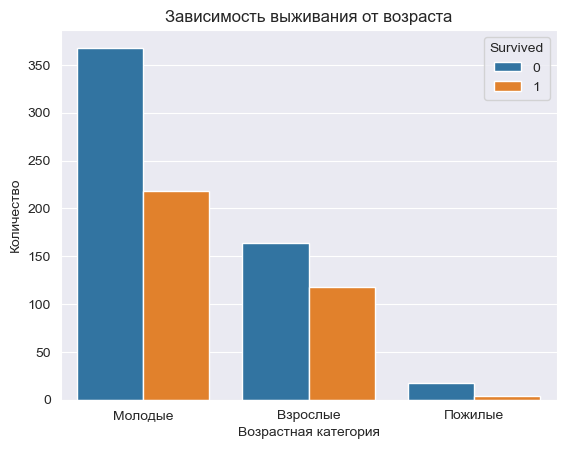

In [99]:
data['Age_category'] = pd.cut(data['Age'], bins=[0, 30, 60, data['Age'].max()], labels=['Молодые', 'Взрослые', 'Пожилые'])

sns.countplot(x='Age_category', hue='Survived', data=data)
plt.title('Зависимость выживания от возраста')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество')
plt.show()

**Построить корреляционную матрицу. Выделить признаки, которые имень сильную корреляцию с целевой переменной**

C:\Users\sagop\AppData\Local\Temp\ipykernel_19248\1108486159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


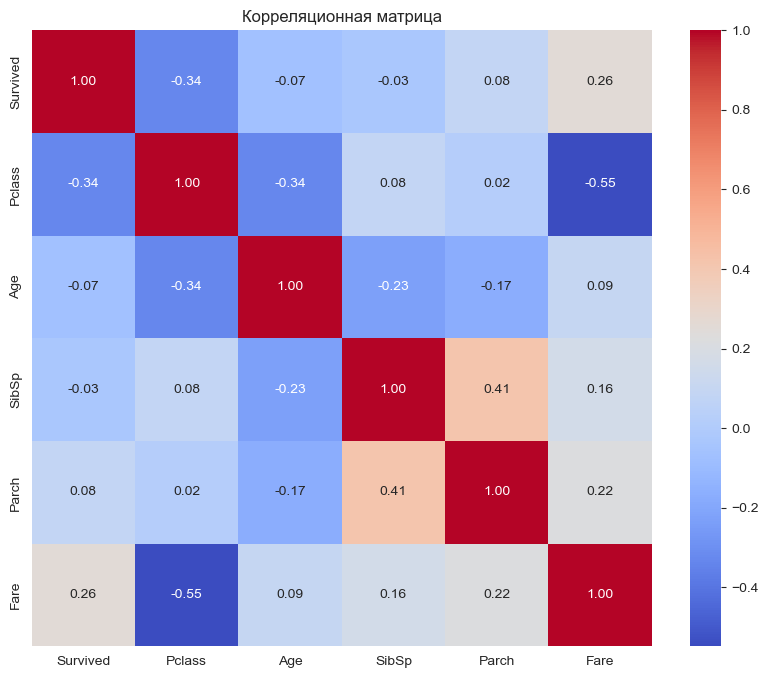

Признаки с сильной корреляцией с целевой переменной:
['Pclass']


In [100]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

strong_corr_features = corr_matrix['Survived'][abs(corr_matrix['Survived']) > 0.3].index.tolist()
print("Признаки с сильной корреляцией с целевой переменной:")
print(strong_corr_features[1:])